# 0. init

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/junhyeok/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/junhyeok/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
# !kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
 96%|████████████████████████████████████▋ | 78.0M/80.9M [00:02<00:00, 36.3MB/s]
100%|██████████████████████████████████████| 80.9M/80.9M [00:02<00:00, 33.5MB/s]


In [7]:
# !unzip sentiment140.zip

Archive:  sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


In [5]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding = "ISO-8859-1", names= ['target', 'id', 'date','flag','user','text'])
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# 1. Preprocess

In [6]:
negative_df = df[df['target'] == 0]
positive_df = df[df['target'] == 4]

In [7]:
negative_sample_df = negative_df.sample(frac=0.3)
positive_sample_df = positive_df.sample(frac=0.3)

In [16]:
negative_text_list = negative_sample_df['text'].apply(word_tokenize)
positive_text_list = positive_sample_df['text'].apply(word_tokenize)

In [26]:
negative_text_list

487478    [@, ixheartxdonnie, girl, i, stopped, by, ur, ...
294686    [Theraflu, does, n't, suck, half, as, much, as...
559422    [noooo, !, i, want, my, sleep, back, D, :, ......
436076    [is, going, to, mom, 's, to, eat, lunch, and, ...
138032    [Just, having, a, 2, min, rest, before, I, sta...
                                ...                        
655967            [Worst, day, everr, and, its, only, 9:30]
761147               [..., programming, ..., no, followers]
309726    [...., my, punishment, and, make, it, an, excu...
158468    [Hungry, again, !, Wow, .., Mexican, sounds, g...
627993    [Forgot, to, take, my, mascara, before, gym, a...
Name: text, Length: 240000, dtype: object

In [15]:
stopwords = stopwords.words('english')

In [30]:
filtered_negative_text_list = []
filtered_positive_text_list = []

for idx, word_list in negative_text_list.items():
    filtered_negative_text_list.extend([word for word in word_list if str(word).lower() not in stopwords])

for idx, word_list in positive_text_list.items():
    filtered_positive_text_list.extend([word for word in word_list if str(word).lower() not in stopwords])

In [33]:
# Generate word clouds
negative_wordcloud = WordCloud(max_words=200).generate(' '.join(filtered_negative_text_list))
positive_wordcloud = WordCloud(max_words=200).generate(' '.join(filtered_positive_text_list))

# 2. Word Cloud

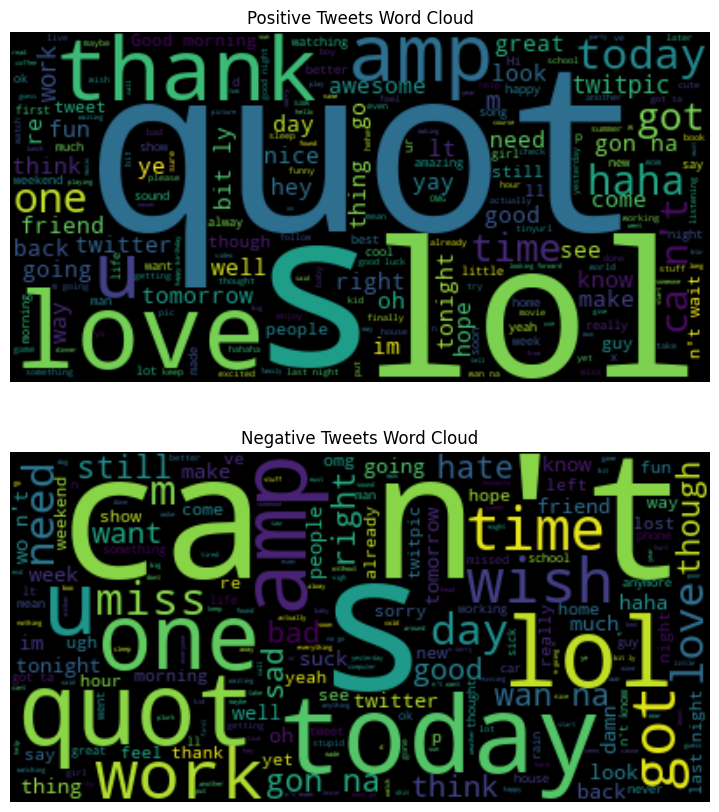

In [34]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
plt.title('Positive Tweets Word Cloud')
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')

plt.subplot(2, 1, 2)
plt.title('Negative Tweets Word Cloud')
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()